Text(0.5, 0, 'Time')

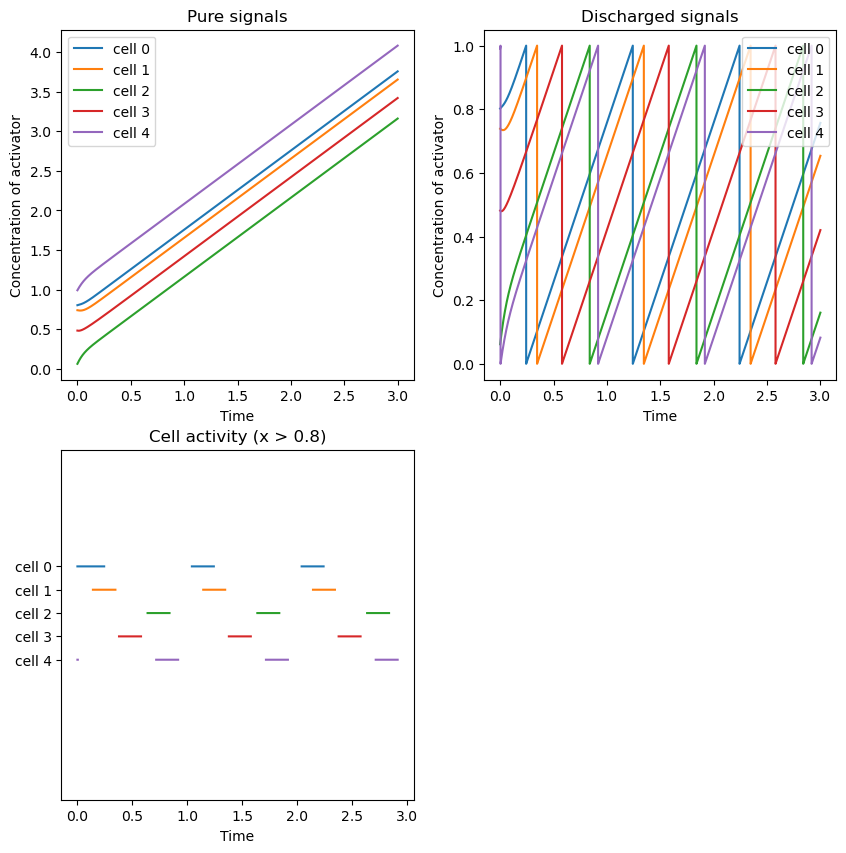

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set production rates that are relatively prime,
# So that the system is not periodic by default
# We want to see the effect of the coupling 

N  = 5 # Number of cells

## w = np.arange(1, N+1)**0.5
w = np.ones(N)

def f(x, w):
    # Function that computes sin(pi(x_i - x_j)) for all pairs of oscillators,
    # and then sums along the rows (axis = 1) to get the total influence on each oscillator
    # If you want to add weights J_ij, you can do so by multiplying sin(pi * pair_diff) with J.
    pair_diff = x[:, None] - x[None, :]
    return w + np.sum(np.sin(pair_diff * 2 * np.pi), axis=1)


def odesolve(x0, f, n_steps, dt, w):
    # Solve the ODE by Euler forward integration
    solution = []
    for n in range(n_steps):
        x0 = (x0 + dt * f(x0, w))
        solution.append(x0)
    return np.stack(solution)


# Initialize oscillators at zero
x0 = np.random.rand(N)
dt = 0.0001
T = 3.
t = np.linspace(0, T, int(T/dt))
x = odesolve(x0, f, int(T/dt), dt, w)

### A Lot of plotting

# ILLUSTRATIONS
plt.figure(figsize=(10,10))

# Figure 1: Plot the pure signals
plt.subplot(221)
plt.title('Pure signals')
plt.plot(t, x, label=[f'cell {i}' for i in range(N)])
plt.legend()
plt.xlabel('Time')
plt.ylabel('Concentration of activator')

# Figure 2: Plot the discharged signals by taking modulo 1
plt.subplot(222)
xd = x % 1.
plt.title('Discharged signals')
plt.plot(t, xd, label=[f'cell {i}' for i in range(N)])
plt.legend()
plt.xlabel('Time')
plt.ylabel('Concentration of activator')


# Figure 3: Plot singular activations as a function of time
plt.subplot(223)
#dx = xd - np.roll(xd, -1, axis=0)
# Find the indices of the cells that are active, set those to the index of the cell
plt.title("Cell activity (x > 0.8)")
x_active = np.where(xd > 0.8, np.arange(N)[None, :], np.nan)
plt.plot(t, x_active)
plt.ylim([2*N, - N])
plt.yticks(list(range(N)), [f'cell {i}' for i in range(N)])
plt.xlabel('Time')


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set production rates that are relatively prime,
# So that the system is not periodic by default
# We want to see the effect of the coupling 

# Number of cells in each direction
N = 10

# Couple adjacent cells.
D = np.diag(np.ones(N-1), k=1) + np.diag(np.ones(N-1), k=-1)
D[0, -1] = 1 # periodic
D[-1, 0] = 1 # Periodic

# Kronecker product helps with 2D, provided that cell matrix is flattened
A = np.kron(D, np.eye(N)) + np.kron(np.eye(N), D) + 0.5 * np.kron(D, D)



## w = np.arange(1, N+1)**0.5
w = np.ones((N, N)).flatten()

def f(x, w):
    # Function that computes sin(pi(x_i - x_j)) for all pairs of oscillators,
    # and then sums along the rows (axis = 1) to get the total influence on each oscillator
    # If you want to add weights J_ij, you can do so by multiplying sin(pi * pair_diff) with J.
    pair_diff = x[:, None] - x[None, :]
    return w + np.sum(A * np.sin(pair_diff * 2 * np.pi), axis=1)


def odesolve(x0, f, n_steps, dt, w):
    # Solve the ODE by Euler forward integration
    solution = []
    for n in range(n_steps):
        x0 = x0 + dt * f(x0, w)
        solution.append(x0)
    return np.stack(solution)


# Initialize oscillators at zero
x0 = np.random.rand(N, N)
x0 = x0.flatten()
dt = 0.0001
T = 3.
t = np.linspace(0, T, int(T/dt))
x = (odesolve(x0, f, int(T/dt), dt, w) % 1) > 0.90
x = np.reshape(x, (-1, N, N))

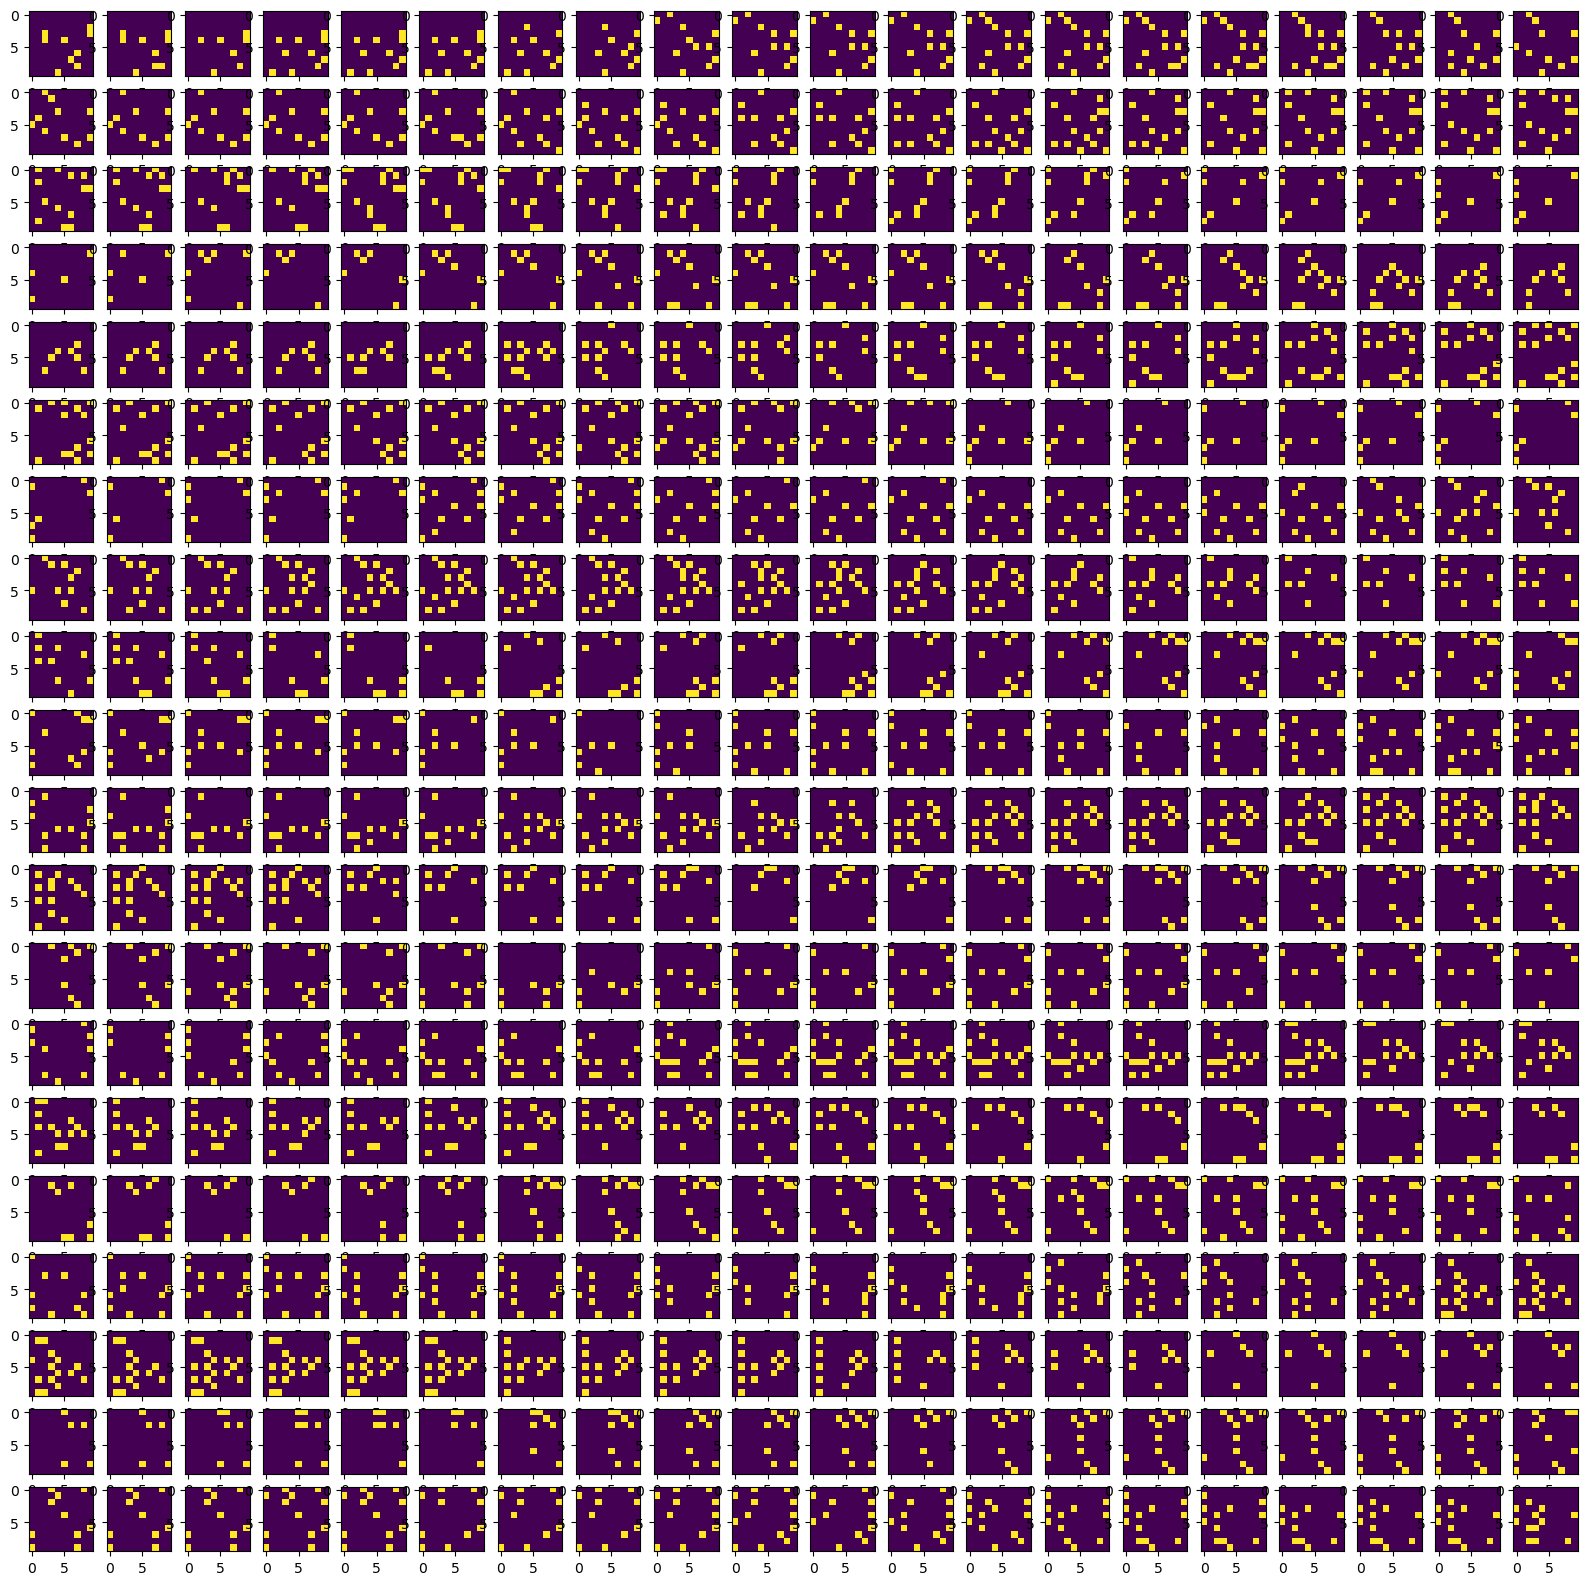

In [6]:

plt.figure(figsize=(20,20))

n = 20
Nt = int(T / dt) // (n * n)
for i in range(n*n):
    xi = x[Nt * i]
    #xi = np.vstack([xi, xi, xi])
    #xi = np.hstack([xi, xi, xi])
    plt.subplot(n, n, i+1)
    plt.imshow(xi, vmin=0, vmax=1)

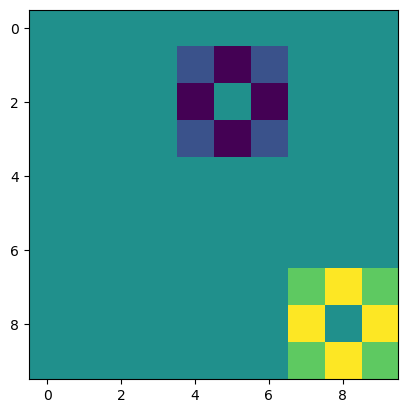

In [4]:

# Checking cell adjacency
# Where does initial state transition to?
x0 = np.zeros((N, N))
x0[8,8] = 1  # Put a 1 at (8, 8)
x0[2,5] = -1 # Put a -1 at (2, 5)
x1 = np.reshape((A @ x0.flatten()[:, None]), (N, N))
plt.imshow(x1)

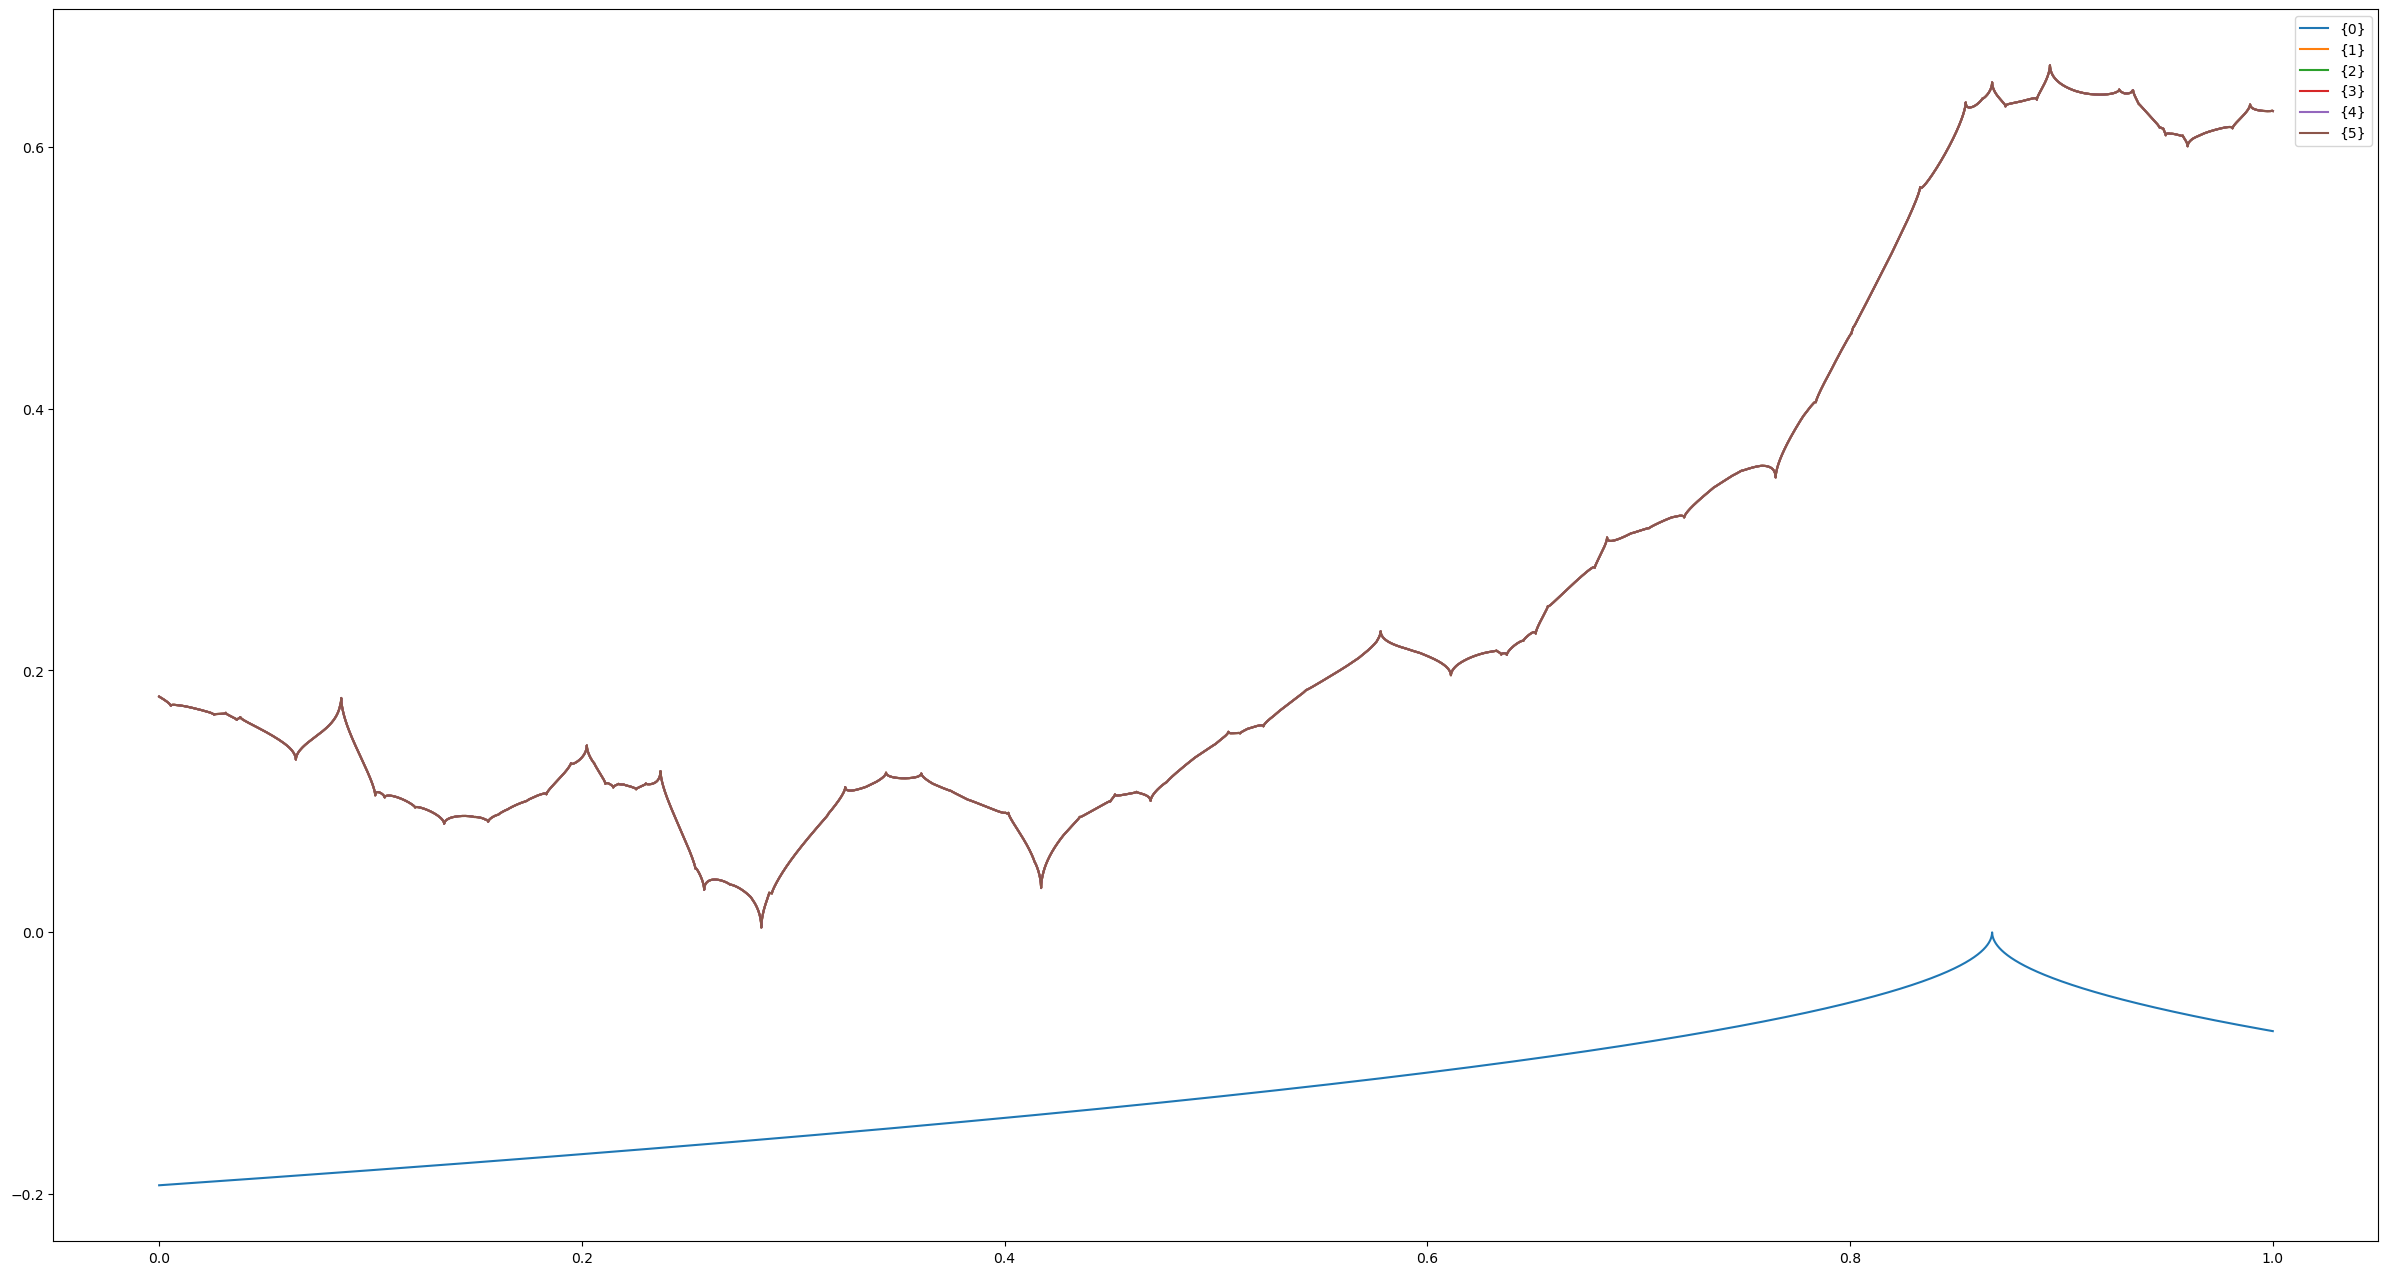

In [46]:
import numpy as np
import matplotlib.pyplot as plt

N = int(3e4)
alph = 0.5
lam = 0.03
#p = -0.5

pn = np.random.rand(N)

x = np.linspace(0, 1, 3*N)
y = 0*x
plt.figure(figsize=(30,16))
for n in range(N):
    y = y + (np.random.rand()-0.5)*np.abs(pn[n]-x)**alph * np.exp(-lam*n)
    
    if n % 5000 == 0:
        plt.plot(x, y, label={n//5000})
        
plt.legend()